Helpers

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def plot_function(f,tmin,tmax,tlabel=None,xlabel=None,axes=False, **kwargs):
    ts = np.linspace(tmin,tmax,1000)
    if tlabel:
        plt.xlabel(tlabel,fontsize=18)
    if xlabel:
        plt.ylabel(xlabel,fontsize=18)
    plt.plot(ts, [f(t) for t in ts], **kwargs)
    if axes:
        total_t = tmax-tmin
        plt.plot([tmin-total_t/10,tmax+total_t/10],[0,0],c='k',linewidth=1)
        plt.xlim(tmin-total_t/10,tmax+total_t/10)
        xmin, xmax = plt.ylim()
        plt.plot([0,0],[xmin,xmax],c='k',linewidth=1)
        plt.ylim(xmin,xmax)

Here are helper functions to plot volume or flow rate vs. time with correct labels.

In [4]:
def plot_volume(f,tmin,tmax,axes=False,**kwargs):
    plot_function(f,tmin,tmax,tlabel="time (hr)", xlabel="volume (bbl)", axes=axes, **kwargs)

def plot_flow_rate(f,tmin,tmax,axes=False,**kwargs):
    plot_function(f,tmin,tmax,tlabel="time (hr)", xlabel="flow rate (bbl/hr)", axes=axes, **kwargs)

# 1 Calculating average flow rates from volumes

These are the *actual* volume and flow rate functions, used throughout the chapter.  You can ignore the formulas that define them.

In [5]:
def volume(t):
    return (t-4)**3 / 64 + 3.3

def flow_rate(t):
    return 3*(t-4)**2 / 64

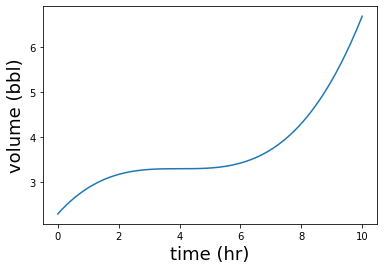

In [6]:
plot_volume(volume,0,10)
plt.savefig('8.3.svg')

## 1.1 Implementing an average_flow_rate function


In [7]:
def average_flow_rate(v,t1,t2):
    return (v(t2) - v(t1))/(t2 - t1)

In [8]:
volume(4)

3.3

In [9]:
volume(9)

5.253125

In [10]:
average_flow_rate(volume,4,9)

0.390625

## 1.2 Picturing the average flow rate with a secant line

## 1.3 Negative rates of change

In [11]:
def decreasing_volume(t):
    if t < 5:
        return 10 - (t**2)/5
    else:
        return 0.2*(10-t)**2

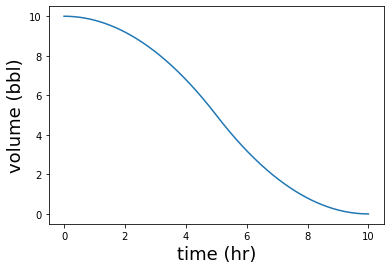

In [12]:
plot_volume(decreasing_volume,0,10)
plt.savefig('8.6.svg')

In [28]:
average_flow_rate(decreasing_volume,0,4)

-0.8

## 1.4 Exercises

**Exercise:** Suppose you start a road-trip at noon, when your odometer reads 77,641 miles and you end your road-trip at 4:30 in the afternoon with your odometer reading 77,905 miles.  What was your average speed during the trip?

In [29]:
(77905 - 77641) / 4.5

58.666666666666664

**Exercise:** Write a Python function `secant_line(f,x1,x2)` that takes a function `f(x)` and two `x` values `x1` and `x2` and returns a new function representing a secant line over time.  For instance, if you ran `line = secant_line(f,x1,x2)` then `line(3)` would give you the $y$-value of the secant line at $x=3$.

In [31]:
def secant_line(f,x1,x2):
    def line(x):
        return f(x1) + (x-x1) * (f(x2)-f(x1))/(x2-x1)
    return line

**Exercise:** Write a function that uses the code from the previous exercise to plot a secant line of a function f between two given points.

In [32]:
def plot_secant(f,x1,x2,color='k'):
    line = secant_line(f,x1,x2)
    plot_function(line,x1,x2,c=color)
    plt.scatter([x1,x2],[f(x1),f(x2)],c=color)

Example: secant line from t=4 to t=8 on our volume graph

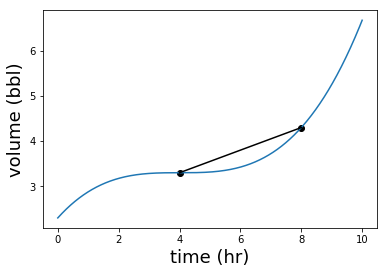

In [35]:
plot_volume(volume,0,10)
plot_secant(volume,4,8)

# 2 Plotting the average flow rate over time

## 2.1 Finding the average flow rate in different time intervals

In [15]:
import numpy as np
np.arange(0,10,0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [16]:
def interval_flow_rates(v,t1,t2,dt):
    return [(t,average_flow_rate(v,t,t+dt))
                for t in np.arange(t1,t2,dt)]

In [17]:
interval_flow_rates(volume,0,10,1)

[(0, 0.578125),
 (1, 0.296875),
 (2, 0.109375),
 (3, 0.015625),
 (4, 0.015625),
 (5, 0.109375),
 (6, 0.296875),
 (7, 0.578125),
 (8, 0.953125),
 (9, 1.421875)]

## 2.2 Plotting the interval flow rates alongside the flow rate function

In [18]:
def plot_interval_flow_rates(volume,t1,t2,dt):
    series = interval_flow_rates(volume,t1,t2,dt)
    times = [t for (t,_) in series]
    rates = [q for (_,q) in series]
    plt.scatter(times,rates)

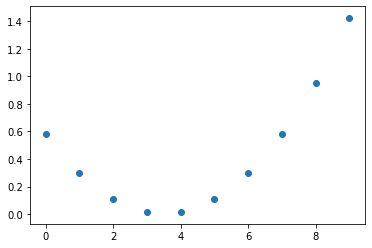

In [19]:
plot_interval_flow_rates(volume,0,10,1)
plt.savefig('8.9.svg')

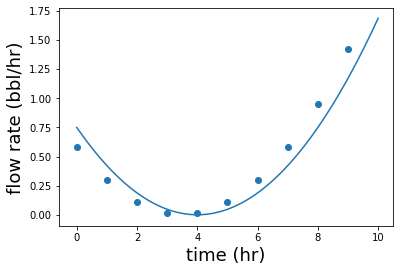

In [20]:
plot_flow_rate(flow_rate,0,10)
plot_interval_flow_rates(volume,0,10,1)
plt.savefig('8.10.svg')

Average flow rate on 20 minute (1/3 hour) intervals, compared to actual `flow_rate` function

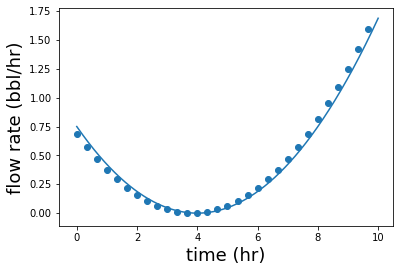

In [28]:
plot_flow_rate(flow_rate,0,10)
plot_interval_flow_rates(volume,0,10,1/3)
plt.savefig('8.11.svg')

## 2.3 Exercises

**Exercise:** Plot the `decreasing_volume` flow rates over time on 0.5 hour intervals.  When is it’s flow rate the lowest?  That is, when is oil leaving the tank at the fastest rate?

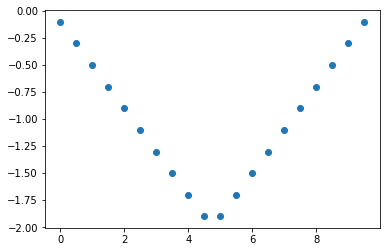

In [24]:
plot_interval_flow_rates(decreasing_volume,0,10,0.5)
plt.savefig('ex8.4.svg')

**Exercise:** Write a linear volume function and plot the flow rate over time to show that it is constant.

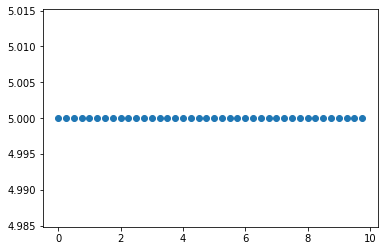

In [27]:
def linear_volume_function(t):
    return 5*t + 3

plot_interval_flow_rates(linear_volume_function,0,10,0.25)
plt.savefig('ex8.5.svg')

# 3 Approximating instantaneous flow rates

## 3.1 Finding the slope of very small secant lines

These calculations result in numbers converging (getting closer and closer) to a value of `0.421875`

In [29]:
average_flow_rate(volume,0.5,1.5)

0.42578125

In [30]:
average_flow_rate(volume,0.9,1.1)

0.4220312499999988

In [31]:
average_flow_rate(volume,0.99,1.01)

0.42187656249998945

In [32]:
average_flow_rate(volume,0.999,1.001)

0.42187501562509583

In [33]:
average_flow_rate(volume,0.9999,1.0001)

0.42187500015393936

In [34]:
average_flow_rate(volume,0.99999,1.00001)

0.4218750000002602

Compare to actual value from flow rate function

In [35]:
flow_rate(1)

0.421875

## 3.2 Building the instantaneous flow rate function

In [38]:
def instantaneous_flow_rate(v,t,digits=6):
    tolerance = 10 ** (-digits) #<1>
    h = 1
    approx = average_flow_rate(v,t-h,t+h) #<2>
    for i in range(0,2*digits): #<3>
        h = h / 10
        next_approx = average_flow_rate(v,t-h,t+h) #<4>
        if abs(next_approx - approx) < tolerance:
            return round(next_approx,digits) #<5>
        else:
            approx = next_approx #<6>
    raise Exception("Derivative did not converge") #<7>

In [39]:
instantaneous_flow_rate(volume,1)

0.421875

## 3.3 Currying and plotting the instantaneous flow rate function

In [40]:
def get_flow_rate_function(v):
    def flow_rate_function(t):
        instantaneous_flow_rate(volume,t)
    return flow_rate_function

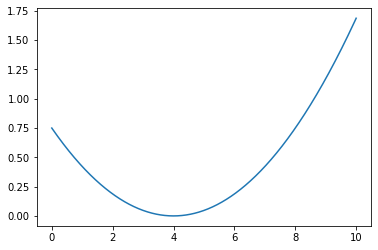

In [41]:
plot_function(flow_rate,0,10)
plot_function(get_flow_rate_function(volume),0,10)

## 3.4 Exercises

**Exercise:** Confirm that the graph of the `volume` function is not a straight line on the interval from 0.999 hours to 1.001 hours.

In [67]:
volume(1)

2.878125

In [68]:
secant_line(volume,0.999,1.001)(1)

2.8781248593749997

**Exercise:** Approximate the slope of a tangent line to the `volume` graph at $t=8$ by computing the slopes of smaller and smaller secant lines around $t=8$.

In [69]:
average_flow_rate(volume,7.9,8.1)

0.7501562500000007

In [70]:
average_flow_rate(volume,7.99,8.01)

0.750001562499996

In [71]:
average_flow_rate(volume,7.999,8.001)

0.7500000156249458

In [72]:
average_flow_rate(volume,7.9999,8.0001)

0.7500000001554312

**Exercise:** For the sign function defined in Python below, convince yourself that it doesn’t have a derivative at $x=0$.

In [73]:
def sign(x):
    return x / abs(x)

In [74]:
average_flow_rate(sign,-0.1,0.1)

10.0

In [75]:
average_flow_rate(sign,-0.01,0.01)

100.0

In [76]:
average_flow_rate(sign,-0.001,0.001)

1000.0

In [77]:
average_flow_rate(sign,-0.000001,0.000001)

1000000.0

# 4 Approximating the change in volume

## 4.1 Finding the change in volume on a short time interval

In [52]:
def small_volume_change(q,t,dt):
    return q(t) * dt

In [53]:
small_volume_change(flow_rate,2,1)

0.1875

In [54]:
volume(3) - volume(2)

0.109375

In [55]:
small_volume_change(flow_rate,2,0.01)

0.001875

In [56]:
volume(2.01) - volume(2)

0.0018656406250001645

## 4.2 Breaking up time into small intervals

In [57]:
def volume_change(q,t1,t2,dt):
    return sum(small_volume_change(q,t,dt)
               for t in np.arange(t1,t2,dt))

In [58]:
volume_change(flow_rate,0,10,0.1)

4.32890625

In [59]:
volume(10) - volume(0)

4.375

In [60]:
volume_change(flow_rate,0,10,0.0001)

4.3749531257812455

## 4.3 Picturing the volume change on the flow rate graph

## 4.4 Exercises

**Exercise:** Approximately how much oil is added to the tank in the first 6 hours?  In the last 4 hours?  During which time interval is more added?

In [61]:
volume_change(flow_rate,0,6,0.01)

1.1278171874999996

In [62]:
volume_change(flow_rate,6,10,0.01)

3.2425031249999257

# 5 Plotting the volume over time

## 5.1 Finding the volume over time

In [63]:
def approximate_volume(q,v0,dt,T):
    return v0 + volume_change(q,0,T,dt)

In [64]:
def approximate_volume_function(q,v0,dt):
    def volume_function(T):
        return approximate_volume(q,v0,dt,T)
    return volume_function

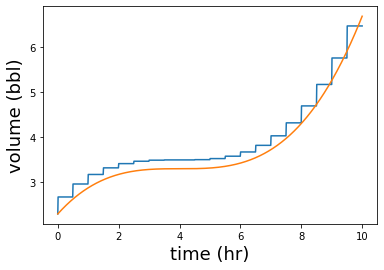

In [66]:
plot_volume(approximate_volume_function(flow_rate,2.3,0.5),0,10)
plot_volume(volume,0,10)
plt.savefig('8.27.svg')

## 5.2 Picturing Riemann sums for the volume function

In [93]:
np.arange(0,3.9,0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5])

## 5.3 Improving the approximation

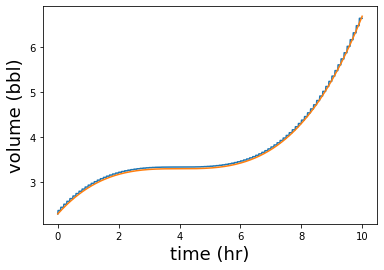

In [68]:
plot_volume(approximate_volume_function(flow_rate,2.3,0.1),0,10)
plot_volume(volume,0,10)
plt.savefig('8.28.svg')

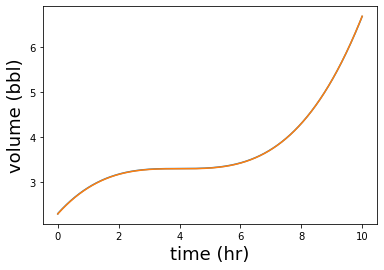

In [69]:
plot_volume(approximate_volume_function(flow_rate,2.3,0.01),0,10)
plot_volume(volume,0,10)
plt.savefig('8.29.svg')

In [96]:
def get_volume_function(q,v0,digits=6):
    def volume_function(T):
        tolerance = 10 ** (-digits)
        dt = 1
        approx = v0 + volume_change(q,0,T,dt)
        for i in range(0,digits*2):
            dt = dt / 10
            next_approx = v0 + volume_change(q,0,T,dt)
            if abs(next_approx - approx) < tolerance:
                return round(next_approx,digits)
            else:
                approx = next_approx
        raise Exception("Did not converge!")
    return volume_function

In [97]:
v = get_volume_function(flow_rate,2.3,digits=3)

In [98]:
v(1)

2.878

In [99]:
v = get_volume_function(flow_rate,2.3,digits=6)

This next line is commented out since it may take 10+ seconds to run, depending on your computer.

In [101]:
# v(1)

## 5.4 Definite and indefinite integrals

# 6 Summary